In [1]:
import os
# import drjit
gpu_num = 3 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 1.3026e-01 | 1.0000e+00 |    18245186 |   140070000 |        15000 |       15000 |       212.3 |reached max iter       
     -4.0 | 9.0853e-02 | 1.0000e+00 |    12725802 |   140070000 |        15000 |       15000 |       193.0 |reached max iter       
     -3.0 | 5.8654e-02 | 1.0000e+00 |     8215702 |   140070000 |        15000 |       15000 |       198.2 |reached max iter       
     -2.0 | 3.4318e-02 | 1.0000e+00 |     4806906 |   140070000 |        15000 |       15000 |       227.6 |reached max iter       
     -1.0 | 1.8491e-02 | 1.0000e+00 |     2589969 |   140070000 |        15000 |       15000 |       248.6 |reached max iter       
      0.0 | 8.9053e-03 | 1.0000e+00 |     1247360 |   140070000 |        15000 |     

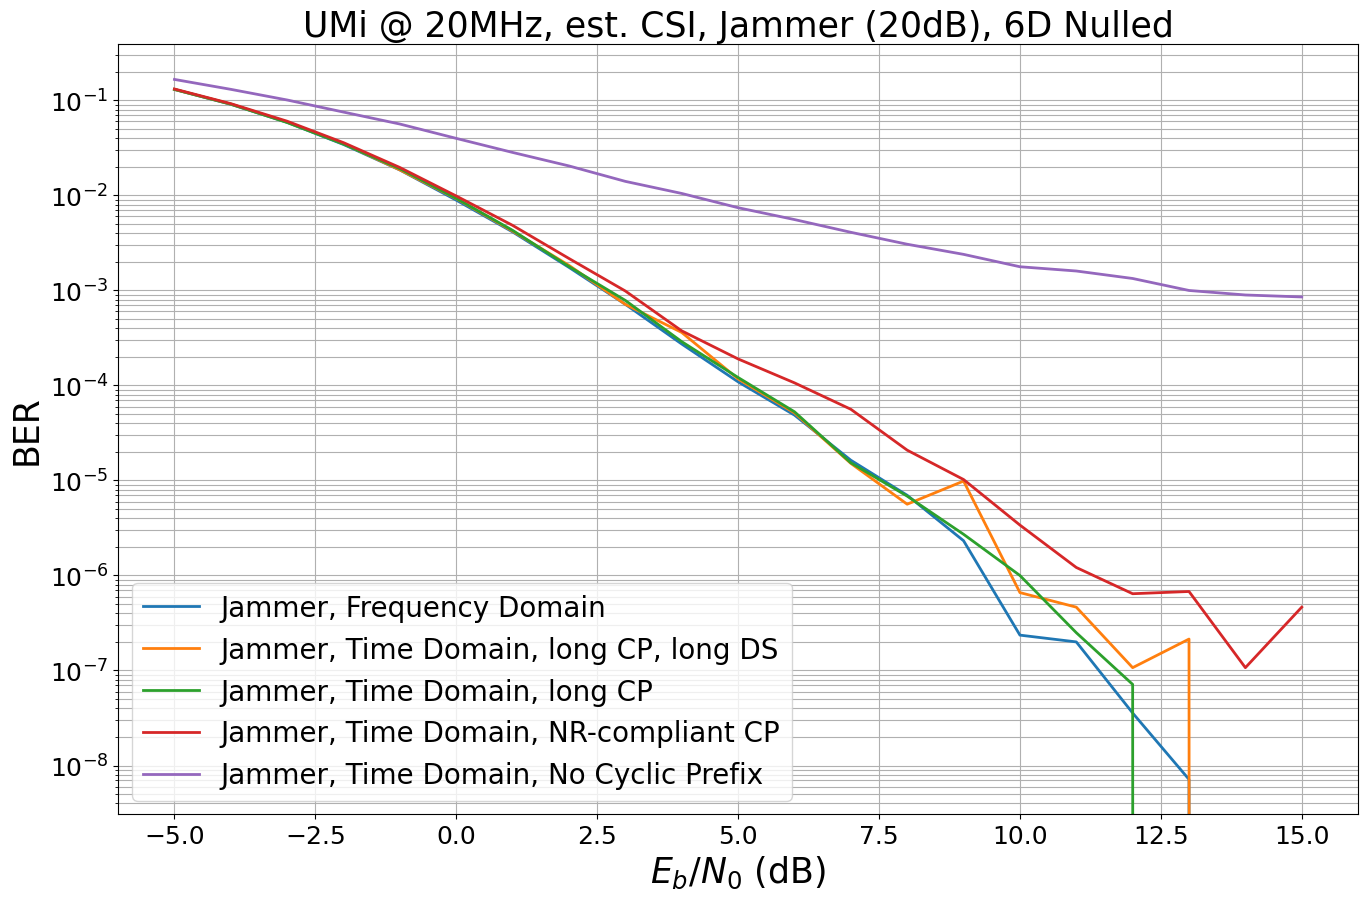

: 

In [3]:
# here real est. CSI & NR compliant
ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters
model_parameters["num_ut"] = 1
model_parameters["perfect_csi"] = False
model_parameters["perfect_jammer_csi"] = False
model_parameters["num_silent_pilot_symbols"] = 6
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(20.)
model_parameters["jammer_mitigation"] = "ian"
model_parameters["scenario"] = "umi"
#NR
model_parameters["fft_size"] = 667 # * 30kHz = 20MHz
# model_parameters["cyclic_prefix_length"] = 47 # 667 * 144 / 2048
model_parameters["cyclic_prefix_length"] = 210
sim.BATCH_SIZE = 30
# sim.MAX_MC_ITER = 100
sim.MAX_MC_ITER = 500
# sim.ebno_dbs = np.linspace(-5., 15., 11)
sim.ebno_dbs = np.linspace(-5., 15., 21)

model = Model(**model_parameters)
simulate_model(model, "Jammer, Frequency Domain")

sim.BATCH_SIZE = 1
sim.MAX_MC_ITER = 6000
model_parameters["domain"] = "time"
model_parameters["maximum_delay_spread"] = 1e-5
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, long CP, long DS")

model_parameters["domain"] = "time"
model_parameters["maximum_delay_spread"] = 3e-6
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, long CP")

model_parameters["domain"] = "time"
model_parameters["maximum_delay_spread"] = 3e-6
jammer_parameters["send_cyclic_prefix"] = True
model_parameters["cyclic_prefix_length"] = 47 # 667 * 144 / 2048
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, NR-compliant CP")

jammer_parameters["send_cyclic_prefix"] = False
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, No Cyclic Prefix")

ber_plots.title = "UMi @ 20MHz, est. CSI, Jammer (20dB), 6D Nulled"
ber_plots()
with open("bers/time_pos_umi_est_1ue_long_ds.pickle", 'wb') as f:
    bers = pickle.dump(ber_plots, f)

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 1.3017e-01 | 1.0000e+00 |    54698591 |   420210000 |        45000 |       45000 |       578.7 |reached max iter       
     -4.0 | 9.0925e-02 | 1.0000e+00 |    38207440 |   420210000 |        45000 |       45000 |       575.4 |reached max iter       
     -3.0 | 5.8624e-02 | 1.0000e+00 |    24634296 |   420210000 |        45000 |       45000 |       584.1 |reached max iter       
     -2.0 | 3.4404e-02 | 1.0000e+00 |    14457042 |   420210000 |        45000 |       45000 |       590.8 |reached max iter       
     -1.0 | 1.8485e-02 | 1.0000e+00 |     7767524 |   420210000 |        45000 |       45000 |       596.1 |reached max iter       
      0.0 | 8.9427e-03 | 1.0000e+00 |     3757830 |   420210000 |        45000 |     

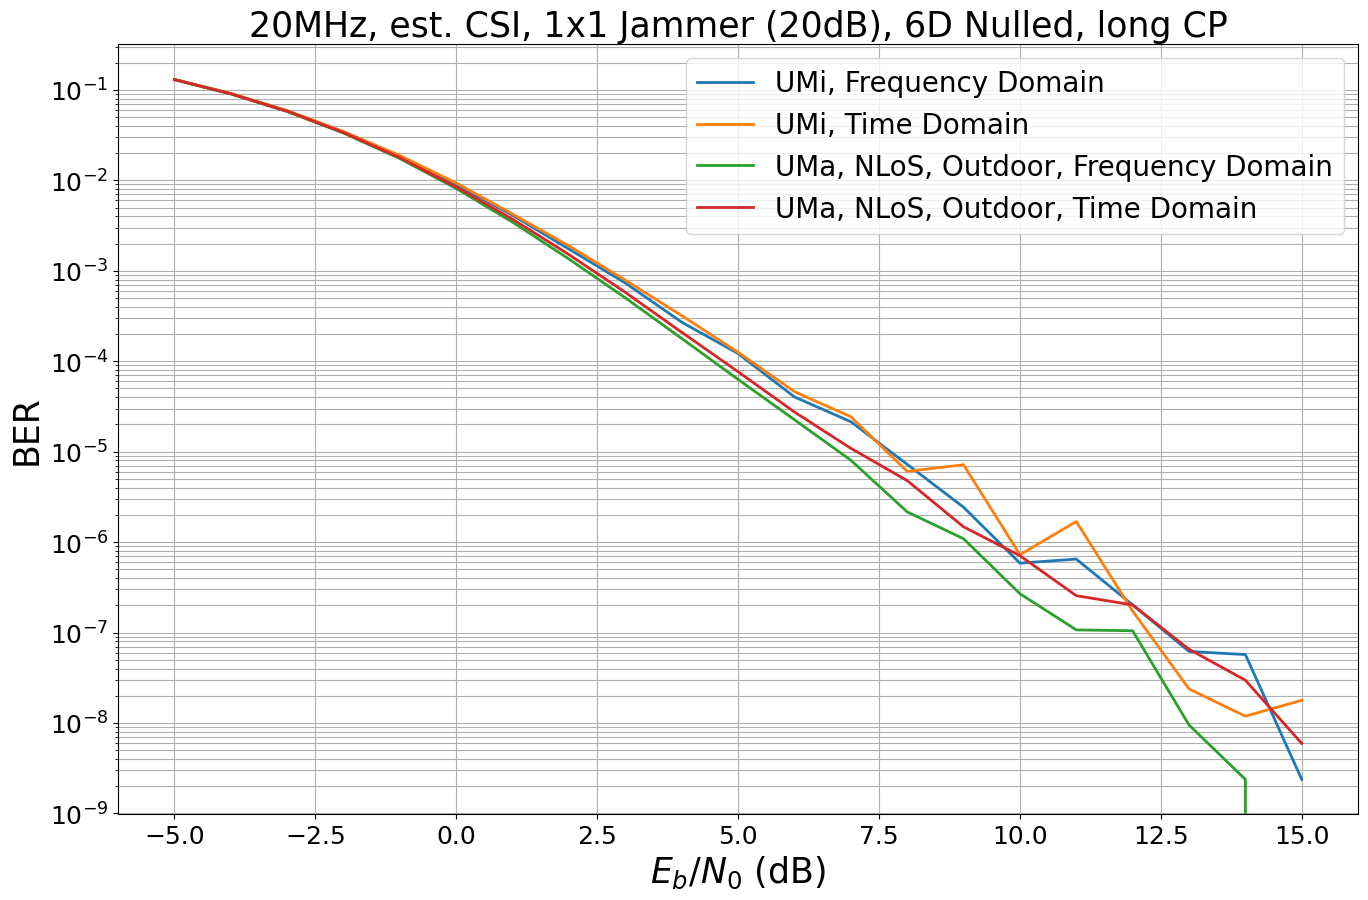

In [3]:
# UMi mixed time vs. freq., UMa NLos time vs. freq., both long CP


# here real est. CSI & NR compliant
ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters

model_parameters["num_ut"] = 1
model_parameters["perfect_csi"] = False
model_parameters["perfect_jammer_csi"] = False
model_parameters["num_silent_pilot_symbols"] = 6
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(20.)
model_parameters["jammer_mitigation"] = "ian"
model_parameters["cyclic_prefix_length"] = 210

model_parameters["fft_size"] = 667 # * 30kHz = 20MHz

#UMi
model_parameters["scenario"] = "umi"
sim.BATCH_SIZE = 30
sim.MAX_MC_ITER = 1500
sim.ebno_dbs = np.linspace(-5., 15., 21)
model = Model(**model_parameters)
simulate_model(model, "UMi, Frequency Domain")

sim.BATCH_SIZE = 1
sim.MAX_MC_ITER = 18000
model_parameters["domain"] = "time"
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "UMi, Time Domain")

#UMa, NLos, outdoor
model_parameters["domain"] = "freq"
del jammer_parameters["send_cyclic_prefix"]
model_parameters["scenario"] = "uma"
model_parameters["indoor_probability"] = 0.0
model_parameters["los"] = False
model_parameters["cyclic_prefix_length"] = 210
sim.BATCH_SIZE = 30
sim.MAX_MC_ITER = 1500
model = Model(**model_parameters)
simulate_model(model, "UMa, NLoS, Outdoor, Frequency Domain")

sim.BATCH_SIZE = 1
sim.MAX_MC_ITER = 18000
model_parameters["domain"] = "time"
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "UMa, NLoS, Outdoor, Time Domain")

ber_plots.title = "20MHz, est. CSI, 1x1 Jammer (20dB), 6D Nulled, long CP"
ber_plots()
with open("bers/time_pos_umi_uma.pickle", 'wb') as f:
    bers = pickle.dump(ber_plots, f)